<a href="https://colab.research.google.com/github/allanpml/financas_python/blob/main/monte_carlo_mglu3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Observação

###### Se você está vendo o código através do Git Hub, clique no ícone "Open in Colab" para que seja possível interagir com os gráficos gerados.



# 1. Bibliotecas utilizadas

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

# 2. Importação da base de dados históricos

In [ ]:
stocks = ["MGLU3.SA"]

prices = pd.DataFrame()

for i in stocks:
    prices[i] = pdr.DataReader(i, data_source = "yahoo", start = "2017-2-14", end = "2022-2-14")["Adj Close"]

prices.head(2)

,MGLU3.SA
Date,
2017-02-14,0.557378
2017-02-15,0.574155


In [ ]:
prices = prices.reset_index()
prices.head(2)

,Date,MGLU3.SA
0,2017-02-14,0.557378
1,2017-02-15,0.574155


# 3. Gráfico de cotação

In [ ]:
price_graphic = px.line(title = 'Histórico do preço das ações')
for i in prices.columns[1:]:
  price_graphic.add_scatter(x = prices['Date'], y = prices[i], name = i)
  price_graphic.update_layout(hovermode="x")

price_graphic.show()

In [ ]:
prices2 = pd.DataFrame(prices["MGLU3.SA"])

# 4. Calculando e normalizando as taxas de retorno

In [ ]:
return_taxes = pd.DataFrame(prices["MGLU3.SA"])
return_taxes

,MGLU3.SA
0,0.557378
1,0.574155
2,0.581612
3,0.609760
4,0.656178
...,...
1239,6.540000
1240,6.600000
1241,6.940000
1242,6.350000


In [ ]:
return_taxes = return_taxes
for i in return_taxes:
    return_taxes[i] = return_taxes[i] / return_taxes[i][0]
return_taxes.head(2)

,MGLU3.SA
0,1.0000
1,1.0301


In [ ]:
return_taxes = np.log(1 + return_taxes.pct_change())
return_taxes.head(2)

,MGLU3.SA
0,NaN
1,0.029656


In [ ]:
return_taxes.fillna(0, inplace=True)
return_taxes.head(2)

,MGLU3.SA
0,0.000000
1,0.029656


# 5. Cálculo do drift
---



###### 5.1 Obtenção de medidas descritivas

In [ ]:
media = return_taxes.mean()
media

MGLU3.SA    0.001972
dtype: float64

In [ ]:
variancia = return_taxes.var()
variancia

MGLU3.SA    0.001377
dtype: float64

# 6. Drift

In [ ]:
drift = media - (0.5 * variancia)
drift

MGLU3.SA    0.001284
dtype: float64

# 7. Cálculo dos retornos diários

In [ ]:
dias_frente = 60
simulacoes = 10

In [ ]:
desvio_padrao = return_taxes.std()
desvio_padrao

MGLU3.SA    0.037106
dtype: float64

# 8. Cálculo de volatilidade

In [ ]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))
Z.shape

(60, 10)

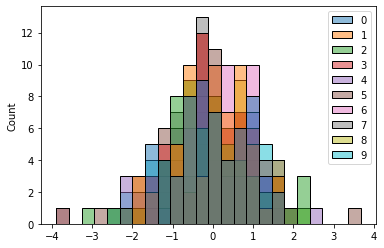

In [ ]:
sns.histplot(Z);

In [ ]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)
retornos_diarios

array([[1.02212006, 0.97193929, 0.97499311, 1.00947821, 0.94806037,
        0.98947653, 1.03109687, 0.91658347, 1.03546229, 0.94997822],
       [0.99211506, 1.04274475, 0.96887261, 0.95746211, 0.99349919,
        1.03171817, 0.99422439, 0.95214843, 0.98819536, 1.03664463],
       [0.99720676, 1.06882606, 1.08448836, 1.0676867 , 1.03734547,
        1.00588262, 1.03772102, 1.06019498, 1.02854227, 0.99888105],
       [0.99062268, 0.98232338, 0.89472773, 1.06104675, 1.03791379,
        0.90618421, 1.03289639, 1.00951955, 1.00442374, 0.9540011 ],
       [1.03563354, 1.05931865, 0.9290083 , 0.98448475, 1.02871721,
        0.99157111, 0.997804  , 0.98956258, 0.97459217, 0.94066801],
       [0.95682975, 0.98031524, 1.01338284, 1.00021087, 0.9400017 ,
        0.95910374, 1.04805341, 1.03988109, 0.98806892, 0.93082882],
       [1.02401906, 1.00598665, 1.01883573, 0.99243839, 0.96528298,
        1.14741879, 0.95448785, 0.96422921, 0.97890398, 0.92555635],
       [0.99258138, 1.0164156 , 0.9522784

(60, 10)

# 9. Previsão de preços futuros

In [ ]:
previsoes = np.zeros_like(retornos_diarios)

In [ ]:
prices2.tail(1)

,MGLU3.SA
1243,6.48


In [ ]:
previsoes[0] = prices2.iloc[-1]

In [ ]:
for dia in range(1, dias_frente):
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]
previsoes

## 10 Gráfico com os cenários

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
  figura.update_layout(hovermode="x")
figura.show()

#11 Gráfico comparativo (simulação x realidade)

In [ ]:
stocks = ["MGLU3.SA"]

prices = pd.DataFrame()

for i in stocks:
    prices[i] = pdr.DataReader(i, data_source = "yahoo", start = "2022-01-01")["Adj Close"]

prices.head(2)

,MGLU3.SA
Date,
2022-01-03,6.72
2022-01-04,6.61


In [ ]:
simulacao1 = previsoes.T[0][0:len(prices)]
simulacao1

array([6.48000002, 6.42890564, 6.41094815, 6.35083061, 6.57713317,
       6.29319669, 6.44435336, 6.39654514, 6.68926845, 6.31026446,
       6.04434093, 5.69810233, 5.59599901, 5.45249175, 5.55389269,
       5.2903616 , 5.28587261, 5.21296361, 5.20587064, 5.06257615,
       5.26903836, 5.22518069, 5.27134255, 5.13902847, 5.28563641,
       5.16910637, 5.21771571, 5.54497134, 5.26464341, 5.17104535,
       5.37650524, 5.40398302])

In [ ]:
len(simulacao1)


32

In [ ]:
np.sum(abs(simulacao1 - prices["MGLU3.SA"])) / len(simulacao1)

0.935641902178709

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prices["MGLU3.SA"], simulacao1)

0.935641902178709

In [ ]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(prices)]
  erros.append(mean_absolute_error(prices['MGLU3.SA'], simulacao))
    
erros

[0.935641902178709,
 0.6925136389886832,
 1.0567387247474054,
 0.9616922442511568,
 0.7930933207548471,
 0.4913979611836191,
 0.6153136992169271,
 0.5507774981417701,
 0.2977648509598069,
 1.2063771511955625]

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = prices['MGLU3.SA'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[9], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[8], name = 'Melhor simulação')
figura.update_layout(hovermode="x")